<img align="right" src="https://i.insider.com/599aff99f1a850c02a8b60bb?width=1000&format=jpeg&auto=webp" alt="Drawing" style="width: 400px;"/>

## Solar eclipse from year 1000 to 3000 
Eclipses of the sun can only occur when the moon is near one of its two orbital nodes during the new moon phase. It is then possible for the Moon's penumbral, umbral, or antumbral shadows to sweep across Earth's surface thereby producing an eclipse. 

There are four types of solar eclipses: 
- Partial eclipse: during which the moon's penumbral shadow traverses Earth and umbral and antumbral shadows completely miss Earth
- Annular eclipse: during which the moon's antumbral shadow traverses Earth but does not completely cover the sun
- Total eclipse: during which the moon's umbral shadow traverses Earth and completely covers the sun
- Hybrid eclipse: during which the moon's umbral and antumbral shadows traverse Earth and annular and total eclipses are visible in different locations. 

Source: NASA

Data keys: https://eclipse.gsfc.nasa.gov/SEcat5/SEcatkey.html



### Objective:
1. To show types of eclipse that happens most often.
2. Top 10 years that experience most solar eclipse.
3. Relationship between type of eclipse and it's magnitude.
4. Obtain informations on eclipses of selected year.

Import neccessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

#### Pull dataset

In [15]:
#Read data
solar=pd.read_csv('newsolar.csv')
solar

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,7124,1000 April 7,9:21:38,1561,-12365,103,T,0.1892,1.0348,18.7N,40.8E,79,151,119,03m01s
1,7125,1000 September 30,11:45:53,1558,-12359,108,A,-0.1075,0.9919,10.6S,4.1E,84,29,29,00m47s
2,7126,1001 March 27,19:20:56,1556,-12353,113,A,0.9775,0.9637,61.1N,178.0W,11,101,642,02m26s
3,7127,1001 September 20,0:19:08,1553,-12347,118,T,-0.8111,1.0388,46.1S,144.9E,36,44,218,02m43s
4,7128,1002 February 15,4:30:46,1551,-12342,85,P,-1.2256,0.5752,61.3S,127.0W,0,247,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,11894,2998 December 10,3:18:31,4414,12355,187,P,1.2838,0.4773,67.2N,145.0E,0,179,NaN,NaN
4771,11895,2999 May 6,23:23:57,4417,12360,154,T,0.8388,1.0566,71.5N,177.3E,33,146,345,03m25s
4772,11896,2999 October 30,9:34:33,4420,12366,159,A-,-1.0023,0.9586,70.9S,84.7W,0,137,-,-
4773,11897,3000 April 26,14:18:06,4424,12372,164,T,0.1310,1.0222,21.1N,18.4W,82,166,76,02m11s


#### Cleaning the data

In [3]:
#Drop unnecessary columns
solar.drop(columns=['Catalog Number','Lunation Number','Saros Number','Gamma'], inplace=True)

In [4]:
#check for which columns have null value
solar.isnull().sum()

Calendar Date           0
Eclipse Time            0
Delta T (s)             0
Eclipse Type            0
Eclipse Magnitude       0
Latitude                0
Longitude               0
Sun Altitude            0
Sun Azimuth             0
Path Width (km)      1684
Central Duration     1684
dtype: int64

In [5]:
#Handle null values
solar.fillna(value={'Path Width (km)':'-','Central Duration':'-'}, inplace=True)
solar.tail()

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
4770,2998 December 10,3:18:31,4414,P,0.4773,67.2N,145.0E,0,179,-,-
4771,2999 May 6,23:23:57,4417,T,1.0566,71.5N,177.3E,33,146,345,03m25s
4772,2999 October 30,9:34:33,4420,A-,0.9586,70.9S,84.7W,0,137,-,-
4773,3000 April 26,14:18:06,4424,T,1.0222,21.1N,18.4W,82,166,76,02m11s
4774,3000 October 19,16:10:16,4428,H,1.0049,23.1S,51.6W,77,16,17,00m29s


In [6]:
#Extract year from Calendar Date
solar['Year']=solar['Calendar Date'].apply(lambda x:x[:4])

#Extract main eclipse type from eclipse type
solar['Main Eclipse Type']=solar['Eclipse Type'].apply(lambda x:x[:1])

solar.tail()

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration,Year,Main Eclipse Type
4770,2998 December 10,3:18:31,4414,P,0.4773,67.2N,145.0E,0,179,-,-,2998,P
4771,2999 May 6,23:23:57,4417,T,1.0566,71.5N,177.3E,33,146,345,03m25s,2999,T
4772,2999 October 30,9:34:33,4420,A-,0.9586,70.9S,84.7W,0,137,-,-,2999,A
4773,3000 April 26,14:18:06,4424,T,1.0222,21.1N,18.4W,82,166,76,02m11s,3000,T
4774,3000 October 19,16:10:16,4428,H,1.0049,23.1S,51.6W,77,16,17,00m29s,3000,H


In [7]:
#Using dictionary to replace PATH in Main Eclipse Type to P: Partial, A: Annular, T: Total, H: Hybrid
solar['Main Eclipse Type'].replace({'P': 'Partial','A':'Annular', 'T':'Total', 'H':'Hybrid'}, inplace=True)
solar.tail()

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration,Year,Main Eclipse Type
4770,2998 December 10,3:18:31,4414,P,0.4773,67.2N,145.0E,0,179,-,-,2998,Partial
4771,2999 May 6,23:23:57,4417,T,1.0566,71.5N,177.3E,33,146,345,03m25s,2999,Total
4772,2999 October 30,9:34:33,4420,A-,0.9586,70.9S,84.7W,0,137,-,-,2999,Annular
4773,3000 April 26,14:18:06,4424,T,1.0222,21.1N,18.4W,82,166,76,02m11s,3000,Total
4774,3000 October 19,16:10:16,4428,H,1.0049,23.1S,51.6W,77,16,17,00m29s,3000,Hybrid


In [8]:
#Round Eclipse Magnitude value to 2 decimal places
solar['Eclipse Magnitude']=round(solar['Eclipse Magnitude'],2)
solar.head()

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration,Year,Main Eclipse Type
0,1000 April 7,9:21:38,1561,T,1.03,18.7N,40.8E,79,151,119,03m01s,1000,Total
1,1000 September 30,11:45:53,1558,A,0.99,10.6S,4.1E,84,29,29,00m47s,1000,Annular
2,1001 March 27,19:20:56,1556,A,0.96,61.1N,178.0W,11,101,642,02m26s,1001,Annular
3,1001 September 20,0:19:08,1553,T,1.04,46.1S,144.9E,36,44,218,02m43s,1001,Total
4,1002 February 15,4:30:46,1551,P,0.58,61.3S,127.0W,0,247,-,-,1002,Partial


#### Plotting graph

In [9]:
#set graph's style 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['font.size'] = 14

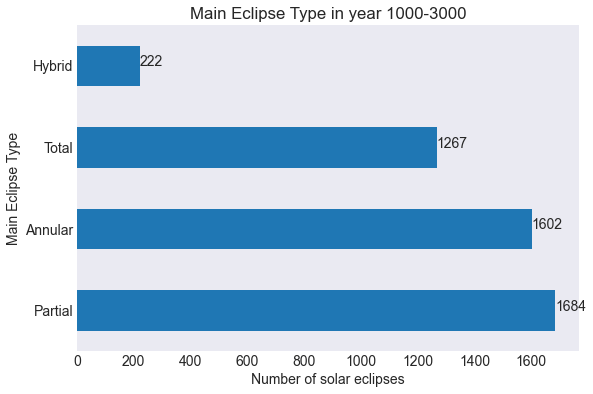

In [10]:
#To find out which type of solar eclipse happens most often

solar['Main Eclipse Type'].value_counts().plot(kind='barh', grid=False)

plt.title('Main Eclipse Type in year 1000-3000')
plt.xlabel('Number of solar eclipses')
plt.ylabel('Main Eclipse Type')

#To show bar values:
#y as list
y=list(solar['Main Eclipse Type'].value_counts())
#for 4 elements in main eclipse type,
four_types=y[0:4]
#loop through every types, value_counts in y, plt.text the bar values
for i, v in enumerate(four_types):
    plt.text(v,i,str(v))

Text(0, 0.5, 'Number of solar eclipse')

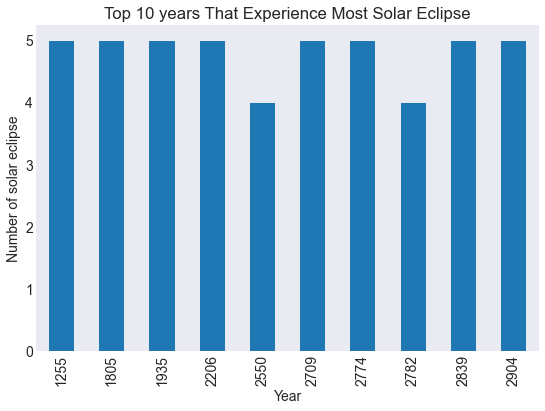

In [11]:
#10 years that experience most solar eclipse

solar['Year'].value_counts().head(10).sort_index().plot(kind='bar')

plt.title('Top 10 years That Experience Most Solar Eclipse')
plt.xlabel('Year')
plt.ylabel('Number of solar eclipse')

Text(0.5, 1.0, 'Eclipse Magnitude versus Main Eclipse Type')

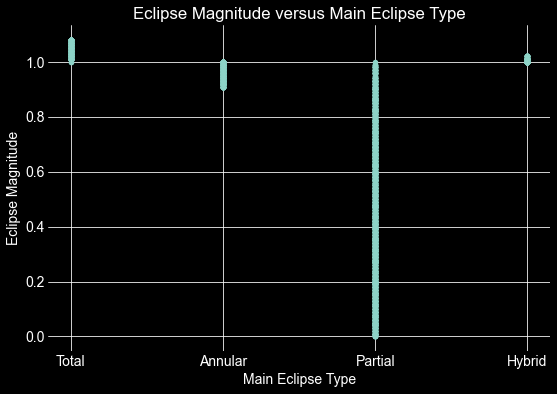

In [12]:
#Relationship between type of eclipse and magnitude of eclipse

plt.style.use('dark_background')

solar.plot(kind='scatter', x='Main Eclipse Type', y='Eclipse Magnitude',grid=True)

plt.title('Eclipse Magnitude versus Main Eclipse Type')

### To find out eclipses in selected year

In [13]:
#define solar_eclipse_in_year to select year
def solar_eclipse_in_year():
#to make sure user input the correct year, 
    while True:  #loop until correct input are given
#try-except block to make sure user input an integer
        try:  
            inputyear=int(input('Year (Between 1000 and 3000): '))
#make sure input in range 1000-3000
            if (inputyear < 1000) or (inputyear > 3000): 
                print("Try again")
                
            else:
                print('\n')
                print('Solar Eclipse data for year',inputyear,'is as below:-')
                print('\n')
#print most-related infos of eclipse on selected year
                solaryeardata=solar[solar['Year']==str(inputyear)][[
                    'Calendar Date','Main Eclipse Type','Eclipse Time','Eclipse Magnitude','Latitude','Longitude']]
                print(solaryeardata)
                print('\n')
#loop-to get the right image for every eclipse per year
                for eclipsetype in list(solaryeardata['Main Eclipse Type']):

                    if eclipsetype =='Total':
                        eclipseimage='total solar eclipse.png'

                    elif eclipsetype=='Partial':
                        eclipseimage='partial solar eclipse.jpg'

                    elif eclipsetype=='Annular':
                        eclipseimage='annular solar eclipse.png'

                    elif eclipsetype=='Hybrid':
                        eclipseimage='hybrid solar eclipse.jpg'

                    plt.rcParams["axes.grid"] = False  #remove grid
                    image=img.imread(eclipseimage)
                    plt.figure()
                    plt.imshow(image)
                break
#print out the error when user input other than integer                           
        except Exception as ex:
            print("Sorry! There is an error {} with exception {}.Try again.".format(type(ex).__name__,ex.args)) 
            continue

Year (Between 1000 and 3000): 1000


Solar Eclipse data for year 1000 is as below:-


       Calendar Date Main Eclipse Type Eclipse Time  Eclipse Magnitude  \
0       1000 April 7             Total      9:21:38               1.03   
1  1000 September 30           Annular     11:45:53               0.99   

  Latitude Longitude  
0    18.7N     40.8E  
1    10.6S      4.1E  




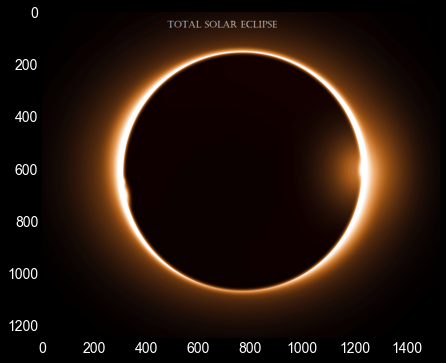

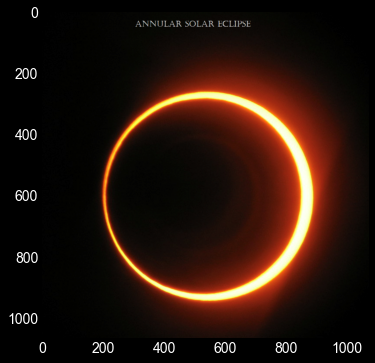

In [14]:
solar_eclipse_in_year()